<a href="https://colab.research.google.com/github/saitejakomaragiri/saitejakomaragiri/blob/main/project2_digitalmarketing_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving simplilearndmtop_tweets.csv to simplilearndmtop_tweets.csv


In [4]:
data = pd.read_csv('simplilearndmtop_tweets.csv')
data.head()

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets
0,Valerie.capodicasa@hpe.com,Valerie.capodicasa@hpe.com,2020-07-27T00:21:18.000Z,Had an opportunity to take an incredible Digit...,NaN,NaN,3.0
1,Ayona Anderson,@EJPMARKETINGCO,2016-04-05T15:16:42.000Z,So excited to begin my Digital Marketing Certi...,NaN,NaN,2.0
2,nitesh verma,@supermodel_8420,2018-08-23T15:48:14.000Z,#simplilearn thank you for such a great digita...,NaN,NaN,NaN
3,Solomo Media,@SolomoMediaIN,2016-01-28T11:35:19.000Z,If you are a Digital Marketing Certified Assoc...,NaN,3.0,2.0
4,Digital Distribution,@DigitalDistrib1,2016-07-27T00:55:37.000Z,Digital Marketing Certified Associate (DMCA) t...,NaN,NaN,NaN


In [6]:
data.shape

(40, 7)

In [15]:
# collecting only tweets from the given dataset

new_data = pd.DataFrame()
new_data['tweets'] = data['Text'].copy()

new_data.head()

,tweets
0,Had an opportunity to take an incredible Digit...
1,So excited to begin my Digital Marketing Certi...
2,#simplilearn thank you for such a great digita...
3,If you are a Digital Marketing Certified Assoc...
4,Digital Marketing Certified Associate (DMCA) t...


In [16]:
# function for cleaning the data

def cleantext(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\W*\d\w*', '', text)
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)

  return text

new_data['tweets'] = new_data['tweets'].apply(cleantext)

#show cleaned data 
new_data.head() 



,tweets
0,had an opportunity to take an incredible digit...
1,so excited to begin my digital marketing certi...
2,simplilearn thank you for such a great digital...
3,if you are a digital marketing certified assoc...
4,digital marketing certified associate dmca tra...


In [17]:
# creating  a function for subjectivity
def createsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# creating a function for polarity
def createpolarity(text):
  return TextBlob(text).sentiment.polarity

# creating subjectivity and polarity columns

new_data['subjectivity'] = new_data['tweets'].apply(createsubjectivity)   
new_data['polarity'] = new_data['tweets'].apply(createpolarity) 

new_data.head(10)

,tweets,subjectivity,polarity
0,had an opportunity to take an incredible digit...,0.475000,0.425000
1,so excited to begin my digital marketing certi...,0.375000,0.187500
2,simplilearn thank you for such a great digital...,0.416667,0.266667
3,if you are a digital marketing certified assoc...,0.000000,0.000000
4,digital marketing certified associate dmca tra...,0.000000,0.000000
5,congrats youve completed the training now you...,0.000000,0.000000
6,blogging become a digital marketing certified ...,0.000000,0.000000
7,become a digital marketing certified associate...,0.000000,0.000000
8,simplilearn online digital marketing certifie...,0.000000,0.000000
9,i have obtained a course certificate of digita...,0.000000,0.000000


In [18]:
# creating a function to check +ve , -ve & neutral comments

def createanalysis(score):
  if (score < 0):
    return 'Negative'
  elif (score == 0):
      return 'Neutral'
  else:
      return 'Positive'

new_data['analysis'] = new_data['polarity'].apply(createanalysis)

# showing the dataset
new_data.head(10)

,tweets,subjectivity,polarity,analysis
0,had an opportunity to take an incredible digit...,0.475000,0.425000,Positive
1,so excited to begin my digital marketing certi...,0.375000,0.187500,Positive
2,simplilearn thank you for such a great digital...,0.416667,0.266667,Positive
3,if you are a digital marketing certified assoc...,0.000000,0.000000,Neutral
4,digital marketing certified associate dmca tra...,0.000000,0.000000,Neutral
5,congrats youve completed the training now you...,0.000000,0.000000,Neutral
6,blogging become a digital marketing certified ...,0.000000,0.000000,Neutral
7,become a digital marketing certified associate...,0.000000,0.000000,Neutral
8,simplilearn online digital marketing certifie...,0.000000,0.000000,Neutral
9,i have obtained a course certificate of digita...,0.000000,0.000000,Neutral


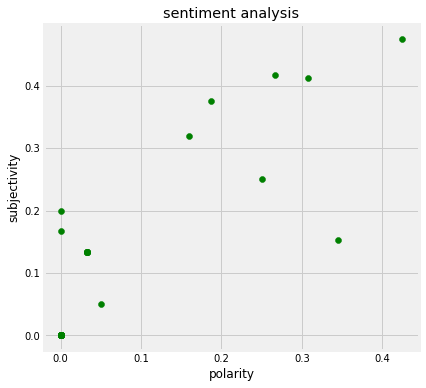

In [12]:
# plotting a scatter plot 

plt.figure(figsize=(6,6))
for i in range(0, data.shape[0]):
  plt.scatter(new_data['polarity'][i], new_data['subjectivity'][i], color = 'Green')

plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentiment analysis')
plt.show()


In [13]:
#number of positive , negative & neutral comments comments
poscomments = 0
neutralcomments = 0
negcomments = 0

for i in range (0, data.shape[0]):
  if (new_data['analysis'][i] == 'Positive'):
    poscomments = poscomments+1
  elif (new_data['analysis'][i] == 'Neutral'):
    neutralcomments = neutralcomments+1
  else :
      negcomments = negcomments+1

print('number of positive tweets :',poscomments)
print('number of neutral tweets :',neutralcomments)
print('number of negative tweets :',negcomments)   

number of positive tweets : 18
number of neutral tweets : 22
number of negative tweets : 0


In [14]:
#number of positive , negative & neutral comments comments

print('percentage of positive comments :', round((poscomments/new_data.shape[0])*100, 1),'%')

print('percentage of neutral comments :', round((neutralcomments/new_data.shape[0])*100, 1),'%')

print('percentage of negative comments :', round((negcomments/new_data.shape[0])*100, 1),'%')

percentage of positive comments : 45.0 %
percentage of neutral comments : 55.0 %
percentage of negative comments : 0.0 %
